In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset  = tf.keras.preprocessing.image_dataset_from_directory(
    "drive/My Drive/plant village",
    shuffle=True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

(256, 256, 3)


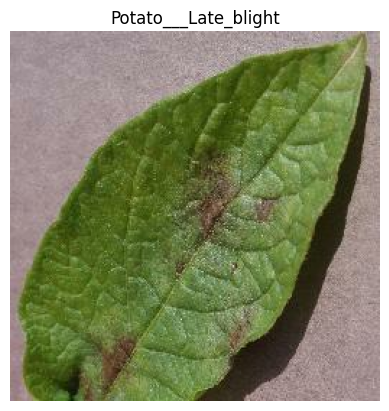

In [ ]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.axis('off')
  print(image_batch[0].numpy().shape)
  #print(class_name[label_batch[0]])
  plt.title(class_name[label_batch[0]])

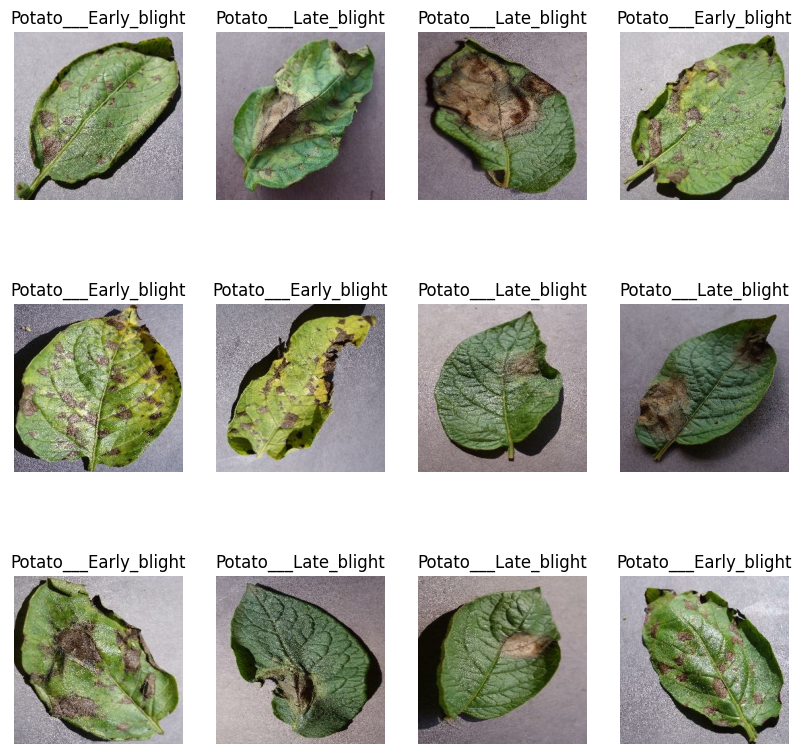

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_name[label_batch[i]])
    plt.axis('off')


In [ ]:
def partition_train_test(ds,train_size=0.8,valid_size=0.1,test_size=0.1,shuffle=True,shuffle_size=10000):

  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)


  train_ds = ds.take(int(len(ds)*train_size))
  test_ds = ds.skip(len(train_ds))
  valid_ds = test_ds.take(int(len(ds)*valid_size))
  test_ds = test_ds.skip(len(valid_ds))

  return train_ds,valid_ds,test_ds

In [ ]:
train_ds,valid_ds,test_ds = partition_train_test(dataset)
print(len(train_ds), " ", len(valid_ds), " ", len(test_ds))

54   6   8


### Caching:
 avoids redundant data loading by caching onto ram or disk
### shuffle:
shuffles elements randomly(larger the size more randomness introduces to dataset)
### prefetch
allows for loadfing and preprocessing to work asynchrounasly



In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


Applying random transformation to the data to artficialy create diverse data set

In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [ ]:
model = models.Sequential(
    [
        resize_rescale,
        data_augmentation,

        #32 filters each of size 3*3
        layers.Conv2D(32,(3,3),activation='relu',input_shape = (32,256,256,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        #flatten layer to enter the neurons
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        #classes=3
        layers.Dense(3,activation='softmax')


    ]
)
#batc_size,image_size,image_size,channels
model.build(input_shape=(32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=25,
    batch_size=32,
    verbose=1,
    validation_data = valid_ds
)

Epoch 1/25
54/54 [==============================] - 401s 3s/step - loss: 0.8646 - accuracy: 0.5648 - val_loss: 0.6989 - val_accuracy: 0.7292
Epoch 2/25
54/54 [==============================] - 160s 3s/step - loss: 0.5076 - accuracy: 0.8050 - val_loss: 0.4689 - val_accuracy: 0.8073
Epoch 3/25
54/54 [==============================] - 159s 3s/step - loss: 0.3361 - accuracy: 0.8594 - val_loss: 0.2402 - val_accuracy: 0.9115
Epoch 4/25
54/54 [==============================] - 170s 3s/step - loss: 0.1688 - accuracy: 0.9369 - val_loss: 0.2527 - val_accuracy: 0.8906
Epoch 5/25
54/54 [==============================] - 175s 3s/step - loss: 0.1870 - accuracy: 0.9410 - val_loss: 0.1767 - val_accuracy: 0.9427
Epoch 6/25
54/54 [==============================] - 172s 3s/step - loss: 0.1160 - accuracy: 0.9537 - val_loss: 0.1071 - val_accuracy: 0.9844
Epoch 7/25
54/54 [==============================] - 172s 3s/step - loss: 0.1545 - accuracy: 0.9439 - val_loss: 0.1260 - val_accuracy: 0.9740
Epoch 8/25
54

In [ ]:
model_version = 1
model.save('/content/drive/My Drive/Path/To/Your/Model')

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 10s 870ms/step - loss: 0.2018 - accuracy: 0.9258


[0.20176465809345245, 0.92578125]

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/Path/To/Your/Model')

In [ ]:
new_model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>}

In [ ]:
new_model.evaluate(test_ds)

8/8 [==============================] - 190s 1s/step - loss: 0.1533 - accuracy: 0.9336


[0.15329910814762115, 0.93359375]

First image to predict is: 
the prediction is: 
1/1 [==============================] - 2s 2s/step
[9.9999994e-01 3.0457588e-08 1.9885087e-16]
Potato___Early_blight


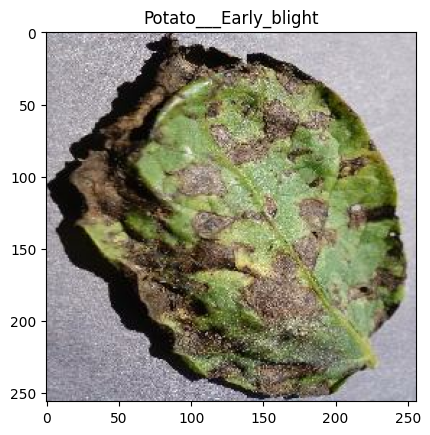

In [ ]:
import numpy as np
for images_batch, label_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("Actual Label: ")
  plt.imshow(first_image)
  plt.title(class_name[first_label])

  print("the prediction is: ")
  predicted_batch = new_model.predict(images_batch)
  print(predicted_batch[0])
  print("Predicted Label ",class_name[np.argmax(predicted_batch[0])])

